In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Table 6

Using input parameters in Table 5, we generate the __QN__ data in Table 6.

In [2]:
df = pd.read_csv('results/sensor_net_closed_baseline/sensor_net_closed_collectResults.csv')

In [3]:
print('___Job Class: Analysis___')
util = df['Uctrl_analysis_mean'].iloc[0]
utilCI = (df['Uctrl_analysis_up'].iloc[0] - df['Uctrl_analysis_low'].iloc[0]) / 2
lat = df['Rctrl_analysis_mean'].iloc[0] + df['Rdb_analysis_mean'].iloc[0]
latCI = (df['Rctrl_analysis_up'].iloc[0] + df['Rdb_analysis_up'].iloc[0] - df['Rctrl_analysis_low'].iloc[0] - df['Rdb_analysis_low'].iloc[0]) / 2
print('Utilization = {:.2f}% (+/- {:.2f}%)'.format(util*100, utilCI*100))
print('System Response Time = {:.2f} msec (+/- {:.2f} msec)'.format(lat*1000, latCI*1000))

print('___Job Class: Status___')
util = df['Uctrl_status_mean'].iloc[0]
utilCI = (df['Uctrl_status_up'].iloc[0] - df['Uctrl_status_low'].iloc[0]) / 2
lat = df['Rctrl_status_mean'].iloc[0] + df['Rsensors_status_mean'].iloc[0]
latCI = (df['Rctrl_status_up'].iloc[0] + df['Rsensors_status_up'].iloc[0] - df['Rctrl_status_low'].iloc[0] - df['Rsensors_status_low'].iloc[0]) / 2
print('Utilization = {:.2f}% (+/- {:.2f}%)'.format(util*100, utilCI*100))
print('System Response Time = {:.2f} msec (+/- {:.2f} msec)'.format(lat*1000, latCI*1000))

print('___Job Class: Actors___')
util = df['Uctrl_actor_mean'].iloc[0]
utilCI = (df['Uctrl_actor_up'].iloc[0] - df['Uctrl_actor_low'].iloc[0]) / 2
lat = df['Rctrl_actor_mean'].iloc[0] + df['Rdb_actor_mean'].iloc[0]
latCI = (df['Rctrl_actor_up'].iloc[0] + df['Rdb_actor_up'].iloc[0] - df['Rctrl_actor_low'].iloc[0] - df['Rdb_actor_low'].iloc[0]) / 2
print('Utilization = {:.2f}% (+/- {:.2f}%)'.format(util*100, utilCI*100))
print('System Response Time = {:.2f} msec (+/- {:.2f} msec)'.format(lat*1000, latCI*1000))

print('___Job Class: Polling___')
util = df['Uctrl_polling_mean'].iloc[0]
utilCI = (df['Uctrl_polling_up'].iloc[0] - df['Uctrl_polling_low'].iloc[0]) / 2
lat = df['Rctrl_polling_mean'].iloc[0] * (df['Xctrl_polling_mean'].iloc[0] / df['Xctrl_analysis_mean'].iloc[0]) # Response_Time * Visits 
latCI = (df['Rctrl_polling_up'].iloc[0] * (df['Xctrl_polling_up'].iloc[0] / df['Xctrl_analysis_up'].iloc[0]) - df['Rctrl_polling_low'].iloc[0] * (df['Xctrl_polling_low'].iloc[0] / df['Xctrl_analysis_low'].iloc[0])) / 2
print('Utilization = {:.2f}% (+/- {:.2f}%)'.format(util*100, utilCI*100))
print('System Response Time = {:.2f} msec (+/- {:.2f} msec)'.format(lat*1000, latCI*1000))

___Job Class: Analysis___
Utilization = 17.77% (+/- 0.41%)
System Response Time = 5.35 msec (+/- 0.10 msec)
___Job Class: Status___
Utilization = 4.07% (+/- 0.08%)
System Response Time = 1.11 msec (+/- 0.02 msec)
___Job Class: Actors___
Utilization = 15.84% (+/- 0.46%)
System Response Time = 3.64 msec (+/- 0.07 msec)
___Job Class: Polling___
Utilization = 10.90% (+/- 0.30%)
System Response Time = 2.18 msec (+/- 0.04 msec)


# Is Everything OK?

In [4]:
df = pd.read_csv('results/sensor_net_closed_IEO_noException/sensor_net_closed_collectResults.csv')
df.sort_values(by='Z_status', inplace=True)

In [5]:
###### Get the system response time per class ######
df['R0_polling_mean'] = df['Rctrl_polling_mean'] * (df['Xctrl_analysis_mean']/df['Xctrl_polling_mean'])
df['R0_polling_low'] = df['Rctrl_polling_low'] * (df['Xctrl_analysis_low']/df['Xctrl_polling_low'])
df['R0_polling_up'] = df['Rctrl_polling_up'] * (df['Xctrl_analysis_up']/df['Xctrl_polling_up'])

df['R0_analysis_mean'] = df['Rctrl_analysis_mean'] + df['Rdb_analysis_mean']
df['R0_analysis_low'] = df['Rctrl_analysis_low'] + df['Rdb_analysis_low']
df['R0_analysis_up'] = df['Rctrl_analysis_up'] + df['Rdb_analysis_up']

df['R0_status_mean'] = df['Rctrl_status_mean'] + df['Rsensors_status_mean']
df['R0_status_low'] = df['Rctrl_status_low'] + df['Rsensors_status_low']
df['R0_status_up'] = df['Rctrl_status_up'] + df['Rsensors_status_up']

df['R0_exception_mean'] = df['Rctrl_exception_mean']
df['R0_exception_low'] = df['Rctrl_exception_low']
df['R0_exception_up'] = df['Rctrl_exception_up']

df['R0_actor_mean'] = df['Rctrl_actor_mean'] + df['Rdb_actor_mean']
df['R0_actor_low'] = df['Rctrl_actor_low'] + df['Rdb_actor_low']
df['R0_actor_up'] = df['Rctrl_actor_up'] + df['Rdb_actor_up']



###### Get the Controller utilization ######
df['Uctrl_mean'] = df['Uctrl_polling_mean'] + df['Uctrl_analysis_mean'] + df['Uctrl_status_mean'] + df['Uctrl_exception_mean'] + df['Uctrl_actor_mean']
df['Uctrl_low'] = df['Uctrl_polling_low'] + df['Uctrl_analysis_low'] + df['Uctrl_status_low'] + df['Uctrl_exception_low'] + df['Uctrl_actor_low']
df['Uctrl_up'] = df['Uctrl_polling_up'] + df['Uctrl_analysis_up'] + df['Uctrl_status_up'] + df['Uctrl_exception_up'] + df['Uctrl_actor_up']

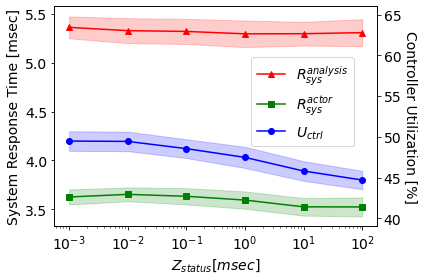

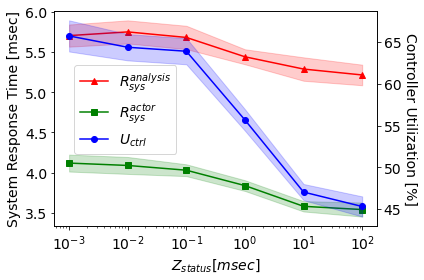

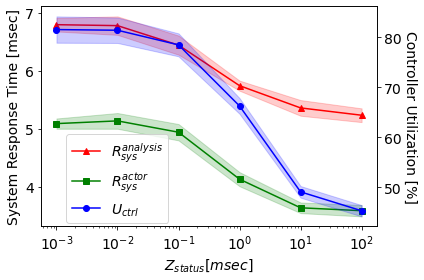

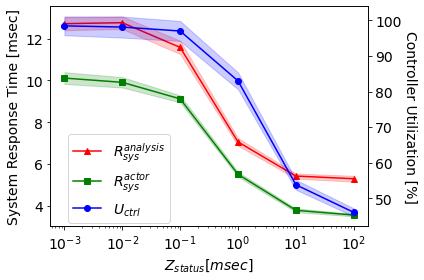

In [6]:
numStatus = [1, 5, 10, 20]

for num in numStatus:
    dfTmp = df[df['num_status']==num]

    fig, ax1 = plt.subplots()

    l1 = ax1.plot(dfTmp['Z_status']*1000, dfTmp['R0_analysis_mean']*1000, label=r'$R_{sys}^{analysis}$', color='red', marker='^', markevery=1)
    ax1.fill_between(dfTmp['Z_status']*1000, dfTmp['R0_analysis_low']*1000, dfTmp['R0_analysis_up']*1000, color='red', alpha=.2)

    l2 = ax1.plot(dfTmp['Z_status']*1000, dfTmp['R0_actor_mean']*1000, label=r'$R_{sys}^{actor}$', color='green', marker='s')
    ax1.fill_between(dfTmp['Z_status']*1000, dfTmp['R0_actor_low']*1000, dfTmp['R0_actor_up']*1000, color='green', alpha=.2)

    ax2 = ax1.twinx()
    l3 = ax2.plot(dfTmp['Z_status']*1000, dfTmp['Uctrl_mean']*100, label=r'$U_{ctrl}$', color='blue', marker='o')
    ax2.fill_between(dfTmp['Z_status']*1000, dfTmp['Uctrl_low']*100, dfTmp['Uctrl_up']*100, color='blue', alpha=.2)

    ax1.set_xlabel(r'$Z_{status} [msec]$', size=14)
    ax1.set_ylabel('System Response Time [msec]', size=14)
    ax2.set_ylabel('Controller Utilization [%]', size=14, rotation=270, labelpad=16)

    ax1.set_xscale('log')
    ax1.tick_params(labelsize=14)
    ax2.tick_params(labelsize=14)
    # It uses different positions for each figure
    if num == 1:
        ax2.set_ylim(39,66)
        ls = l1+l2+l3
        labs = [l.get_label() for l in ls]
        ax1.legend(ls, labs, loc='upper right', bbox_to_anchor=(0.95,0.8), fontsize=14)
    elif num == 5:
        ls = l1+l2+l3
        labs = [l.get_label() for l in ls]
        ax1.legend(ls, labs, loc='upper right', bbox_to_anchor=(0.4,0.78), fontsize=14)
    elif num == 10:
        ls = l1+l2+l3
        labs = [l.get_label() for l in ls]
        ax1.legend(ls, labs, loc='upper right', bbox_to_anchor=(0.4,0.45), fontsize=14)
    elif num == 20:
        ls = l1+l2+l3
        labs = [l.get_label() for l in ls]
        ax1.legend(ls, labs, loc='upper right', bbox_to_anchor=(0.4,0.45), fontsize=14)

    fig.tight_layout()
    fig.set_size_inches(6, 4)
    #plt.savefig('images/case_study/onlyIEO_noException_numStatus'+str(numStatus)+'.pdf')
    plt.show()

# Are We There Yet?

In [7]:
df = pd.read_csv('results/sensor_net_closed_AWTY_varyingPolling_oneServer/sensor_net_closed_collectResults.csv')
df.sort_values(by='Z_polling', inplace=True)

In [8]:
###### Get the system response time per class ######
df['R0_polling_mean'] = df['Rctrl_polling_mean'] * (df['Xctrl_analysis_mean']/df['Xctrl_polling_mean'])
df['R0_polling_low'] = df['Rctrl_polling_low'] * (df['Xctrl_analysis_low']/df['Xctrl_polling_low'])
df['R0_polling_up'] = df['Rctrl_polling_up'] * (df['Xctrl_analysis_up']/df['Xctrl_polling_up'])

df['R0_analysis_mean'] = df['Rctrl_analysis_mean'] + df['Rdb_analysis_mean']
df['R0_analysis_low'] = df['Rctrl_analysis_low'] + df['Rdb_analysis_low']
df['R0_analysis_up'] = df['Rctrl_analysis_up'] + df['Rdb_analysis_up']

df['R0_status_mean'] = df['Rctrl_status_mean'] + df['Rsensors_status_mean']
df['R0_status_low'] = df['Rctrl_status_low'] + df['Rsensors_status_low']
df['R0_status_up'] = df['Rctrl_status_up'] + df['Rsensors_status_up']

df['R0_exception_mean'] = df['Rctrl_exception_mean']
df['R0_exception_low'] = df['Rctrl_exception_low']
df['R0_exception_up'] = df['Rctrl_exception_up']

df['R0_actor_mean'] = df['Rctrl_actor_mean'] + df['Rdb_actor_mean']
df['R0_actor_low'] = df['Rctrl_actor_low'] + df['Rdb_actor_low']
df['R0_actor_up'] = df['Rctrl_actor_up'] + df['Rdb_actor_up']



###### Get the Controller utilization ######
df['Uctrl_mean'] = df['Uctrl_polling_mean'] + df['Uctrl_analysis_mean'] + df['Uctrl_status_mean'] + df['Uctrl_exception_mean'] + df['Uctrl_actor_mean']
df['Uctrl_low'] = df['Uctrl_polling_low'] + df['Uctrl_analysis_low'] + df['Uctrl_status_low'] + df['Uctrl_exception_low'] + df['Uctrl_actor_low']
df['Uctrl_up'] = df['Uctrl_polling_up'] + df['Uctrl_analysis_up'] + df['Uctrl_status_up'] + df['Uctrl_exception_up'] + df['Uctrl_actor_up']

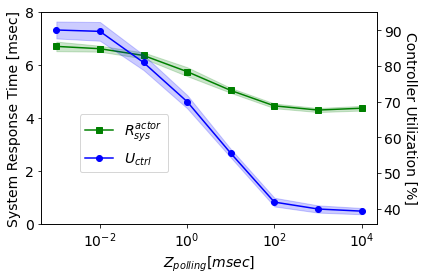

In [9]:
dfTmp = df.copy(deep=True)

fig, ax1 = plt.subplots()

# l1 = ax1.plot(dfTmp['Z_polling'], dfTmp['R0_status_mean'], label=r'$R_{sys}^{status}$', color='red', marker='^', markevery=1)
# ax1.fill_between(dfTmp['Z_polling'], dfTmp['R0_status_low'], dfTmp['R0_status_up'], color='red', alpha=.2)

l2 = ax1.plot(dfTmp['Z_polling']*1000, dfTmp['R0_actor_mean']*1000, label=r'$R_{sys}^{actor}$', color='green', marker='s')
ax1.fill_between(dfTmp['Z_polling']*1000, dfTmp['R0_actor_low']*1000, dfTmp['R0_actor_up']*1000, color='green', alpha=.2)

ax2 = ax1.twinx()
l3 = ax2.plot(dfTmp['Z_polling']*1000, dfTmp['Uctrl_mean']*100, label=r'$U_{ctrl}$', color='blue', marker='o')
ax2.fill_between(dfTmp['Z_polling']*1000, dfTmp['Uctrl_low']*100, dfTmp['Uctrl_up']*100, color='blue', alpha=.2)

ax1.set_xlabel(r'$Z_{polling} [msec]$', size=14)
ax1.set_ylabel('System Response Time [msec]', size=14)
ax2.set_ylabel('Controller Utilization [%]', size=14, rotation=270, labelpad=16)

ax1.set_xscale('log')
# ax1.set_xlim(0,0.01)
# ax1.set_yticks(np.arange(0.0035,0.0136,0.002))
ax1.tick_params(labelsize=14)
ax1.set_ylim(0.,8)
# ax2.set_yticks(range(40,56,3))
ax2.tick_params(labelsize=14)
# ax2.set_ylim(40,55)

ls = l2+l3
labs = [l.get_label() for l in ls]
ax1.legend(ls, labs, loc='upper right', bbox_to_anchor=(0.4,0.55), fontsize=14)

fig.tight_layout()
fig.set_size_inches(6, 4)
#plt.savefig('images/case_study/onlyAWTY_varyingPolling_oneServer.pdf')
plt.show()

# Where Was I?

In [10]:
df = pd.read_csv('results/sensor_net_closed_WWI/sensor_net_closed_collectResults.csv')
df.sort_values(by='S_ctrl_analysis', inplace=True)

In [11]:
###### Get the system response time per class ######
df['R0_polling_mean'] = df['Rctrl_polling_mean'] * (df['Xctrl_analysis_mean']/df['Xctrl_polling_mean'])
df['R0_polling_low'] = df['Rctrl_polling_low'] * (df['Xctrl_analysis_low']/df['Xctrl_polling_low'])
df['R0_polling_up'] = df['Rctrl_polling_up'] * (df['Xctrl_analysis_up']/df['Xctrl_polling_up'])

df['R0_analysis_mean'] = df['Rctrl_analysis_mean'] + df['Rdb_analysis_mean']
df['R0_analysis_low'] = df['Rctrl_analysis_low'] + df['Rdb_analysis_low']
df['R0_analysis_up'] = df['Rctrl_analysis_up'] + df['Rdb_analysis_up']

df['R0_status_mean'] = df['Rctrl_status_mean'] + df['Rsensors_status_mean']
df['R0_status_low'] = df['Rctrl_status_low'] + df['Rsensors_status_low']
df['R0_status_up'] = df['Rctrl_status_up'] + df['Rsensors_status_up']

df['R0_exception_mean'] = df['Rctrl_exception_mean']
df['R0_exception_low'] = df['Rctrl_exception_low']
df['R0_exception_up'] = df['Rctrl_exception_up']

df['R0_actor_mean'] = df['Rctrl_actor_mean'] + df['Rdb_actor_mean']
df['R0_actor_low'] = df['Rctrl_actor_low'] + df['Rdb_actor_low']
df['R0_actor_up'] = df['Rctrl_actor_up'] + df['Rdb_actor_up']



###### Get the Controller utilization ######
df['Uctrl_mean'] = df['Uctrl_polling_mean'] + df['Uctrl_analysis_mean'] + df['Uctrl_status_mean'] + df['Uctrl_exception_mean'] + df['Uctrl_actor_mean']
df['Uctrl_low'] = df['Uctrl_polling_low'] + df['Uctrl_analysis_low'] + df['Uctrl_status_low'] + df['Uctrl_exception_low'] + df['Uctrl_actor_low']
df['Uctrl_up'] = df['Uctrl_polling_up'] + df['Uctrl_analysis_up'] + df['Uctrl_status_up'] + df['Uctrl_exception_up'] + df['Uctrl_actor_up']



###### Get the number of dropped data per second ######
df['dropped_data_mean'] = df['XgenData_data_mean'] - df['Xctrl_analysis_mean']
df['dropped_data_low'] = df['XgenData_data_low'] - df['Xctrl_analysis_low']
df['dropped_data_up'] = df['XgenData_data_up'] - df['Xctrl_analysis_up']

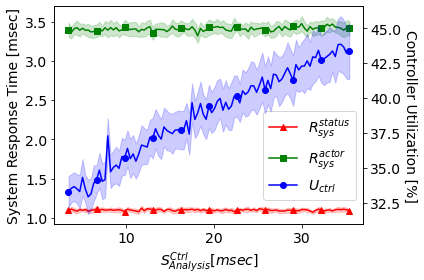

In [12]:
dfTmp = df.copy(deep=True)

fig, ax1 = plt.subplots()

l1 = ax1.plot(dfTmp['S_ctrl_analysis']*1000, dfTmp['R0_status_mean']*1000, label=r'$R_{sys}^{status}$', color='red', marker='^', markevery=10)
ax1.fill_between(dfTmp['S_ctrl_analysis']*1000, dfTmp['R0_status_low']*1000, dfTmp['R0_status_up']*1000, color='red', alpha=.2)

l2 = ax1.plot(dfTmp['S_ctrl_analysis']*1000, dfTmp['R0_actor_mean']*1000, label=r'$R_{sys}^{actor}$', color='green', marker='s', markevery=10)
ax1.fill_between(dfTmp['S_ctrl_analysis']*1000, dfTmp['R0_actor_low']*1000, dfTmp['R0_actor_up']*1000, color='green', alpha=.2)

ax2 = ax1.twinx()
l3 = ax2.plot(dfTmp['S_ctrl_analysis']*1000, dfTmp['Uctrl_mean']*100, label=r'$U_{ctrl}$', color='blue', marker='o', markevery=10)
ax2.fill_between(dfTmp['S_ctrl_analysis']*1000, dfTmp['Uctrl_low']*100, dfTmp['Uctrl_up']*100, color='blue', alpha=.2)

ax1.set_xlabel(r'$S_{Analysis}^{Ctrl} [msec]$', size=14)
ax1.set_ylabel('System Response Time [msec]', size=14)
ax2.set_ylabel('Controller Utilization [%]', size=14, rotation=270, labelpad=16)

# ax1.set_xscale('log')
# ax1.set_xlim(0,0.01)
# ax1.set_xticks(np.arange(0.005,0.036,0.01))
# ax1.set_yticks(np.arange(0.0035,0.0136,0.002))
ax1.tick_params(labelsize=14)
# ax1.set_ylim(0.,0.006)
# ax2.set_yticks(range(40,56,3))
ax2.tick_params(labelsize=14)
# ax2.set_ylim(40,55)

ls = l1+l2+l3
labs = [l.get_label() for l in ls]
ax1.legend(ls, labs, loc='upper right', bbox_to_anchor=(1,0.55), fontsize=14)

fig.tight_layout()
fig.set_size_inches(6, 4)
#plt.savefig('images/case_study/onlyWWI.pdf')
plt.show()

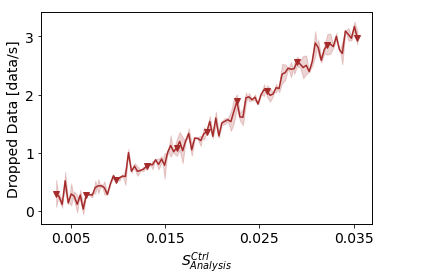

In [13]:
dfTmp = df.copy(deep=True)

fig, ax1 = plt.subplots()

l1 = ax1.plot(dfTmp['S_ctrl_analysis'], dfTmp['dropped_data_mean'], color='brown', marker='v', markevery=10)
ax1.fill_between(dfTmp['S_ctrl_analysis'], dfTmp['dropped_data_low'], dfTmp['dropped_data_up'], color='brown', alpha=.2)

ax2 = ax1.twinx()
# l2 = ax2.plot(dfTmp['S_ctrl_analysis'], dfTmp['Uctrl_mean']*100, label=r'$U_{ctrl}$', color='blue', marker='o')
# ax2.fill_between(dfTmp['S_ctrl_analysis'], dfTmp['Uctrl_low']*100, dfTmp['Uctrl_up']*100, color='blue', alpha=.2)

ax1.set_xlabel(r'$S_{Analysis}^{Ctrl}$', size=14)
ax1.set_ylabel('Dropped Data [data/s]', size=14)
ax2.set_ylabel('Controller Utilization [%]', size=14, rotation=270, labelpad=16, color='white')

# ax1.set_xscale('log')
# ax1.set_xlim(0,0.01)
ax1.set_xticks(np.arange(0.005,0.036,0.01))
# ax1.set_yticks(np.arange(0.0035,0.0136,0.002))
ax1.tick_params(labelsize=14)
# ax1.set_ylim(0.,0.006)
# ax2.set_yticks(color='white')
ax2.tick_params(labelsize=14, colors='white')
# ax2.set_ylim(40,55)

ls = l1
labs = [l.get_label() for l in ls]
# ax1.legend(ls, labs, loc='upper right', bbox_to_anchor=(1,0.25), fontsize=14)

fig.tight_layout()
fig.set_size_inches(6, 4)
#plt.savefig('images/case_study/onlyWWI_droppedData.pdf')
plt.show()